In [11]:
using DelimitedFiles
using Plots

In [16]:
function analytical_psi(t, x)
    return sin(2 * pi * (x - t))
end

analytical_psi (generic function with 1 method)

In [44]:
parent_dir =  "/Users/liwei/docker-workspace/simulations/"
dirs = [
    "scalarwave_1levels_nx100",
    "scalarwave_1levels_nx200",
    "scalarwave_1levels_nx400"
]
dxs = [0.01, 0.005, 0.0025]

3-element Vector{Float64}:
 0.01
 0.005
 0.0025

## Fourth order convergent

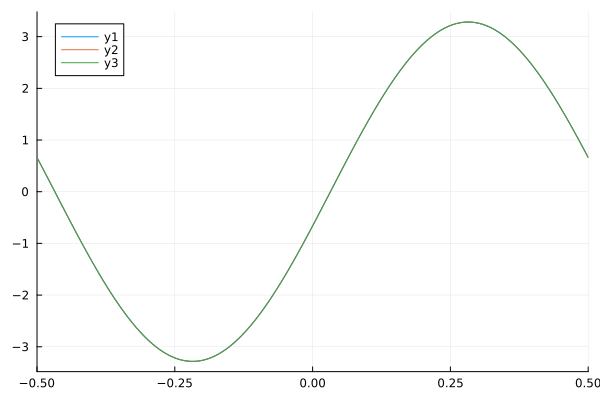

In [49]:
tmax = 0.1
plt = plot()
for i in 1:length(dirs)
    fulldir = parent_dir * dirs[i]
    tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
    for fname in tsv_files
        data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
        if abs(data[1, 2] - tmax) < 1e-12
            x = data[findall(x -> x == 1, data[:, 3]), 5]
            psi = data[findall(x -> x == 1, data[:, 3]), 6]
            error = (psi - analytical_psi.(tmax, x)) * dxs[i]^(-4)
            plt = plot!(x, error, xlim=(-0.5, 0.5))
        end
    end
end
display(plt)